# BTC for constant injection in flux proportional injection mode

Skript reprocuding Figure 4 of Manuscript *Revisitation of the dipole tracer test for heterogeneous porous formations*
by A. Zech, C. D’Angelo, S. Attinger, A. Fiori, Journal of Hydrology, 2018; 
https://doi.org/10.1016/j.advwatres.2018.03.006

Figures discribe the breakthrough curve (BTC) of tracer, i.e. time dependent concentration C(t)
* in a dipole flow setting 
* for instantaneous injection
* in flux proportional injection mode & resident injection mode --> comparison
* observed at the extraction well
* in a layered aquifer with hydraulic conductivity K_i of layers is log-normal distributed
* for a given dimensionless time (as function of settings)

Plot is produced by using the functional implementations of Eq. (8) & Eq. (11) of Zech et al., 2019.

In [1]:
import DipoleTracerTest as dtt
import matplotlib.pyplot as plt

### Settings and initialization of dimensionless time

In [2]:
var_list = [0.1, 1]
tmin  = -3
tmax  = 1

tau = dtt.setup_time(tmin = 10**tmin,tmax = 10**tmax, timesteps=500)

### Prepape plot

The travel time CDF as function of the dimensionless travel time $\tau$ for a few values of the log-conductivity variance $\sigma^2_Y$.

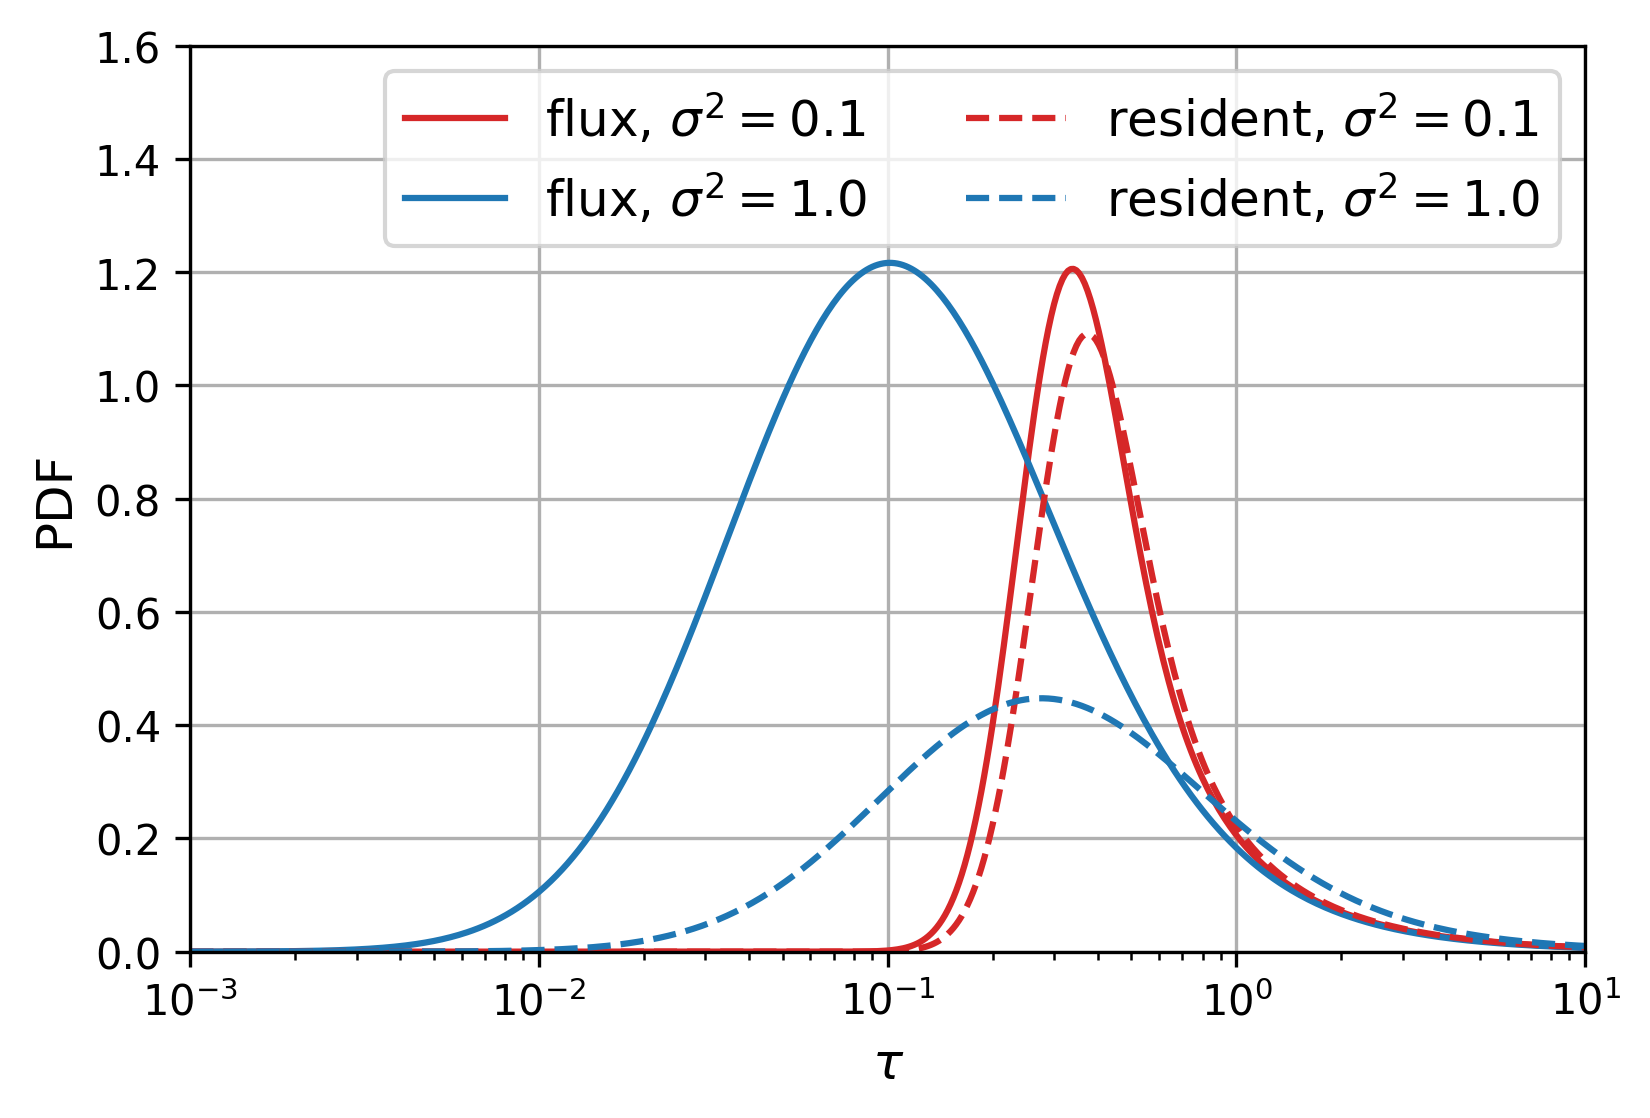

In [6]:
textsize  = 12 # in figures
colors = ['C3','C0']

plt.figure(dpi = 300)

for i,v in enumerate(var_list):
    pdf = dtt.btc_inst_flux(tau,v)
    plt.plot(tau, pdf,c = colors[i],label = r"flux, $\sigma^2=${:.1f}".format(v))

for i,v in enumerate(var_list):
    pdf = dtt.btc_inst_resident(tau,v)
    plt.plot(tau, pdf,c = colors[i],ls = '--',label = r"resident, $\sigma^2=${:.1f}".format(v))

plt.axis([1e-3,1e1, 0,1.6])
plt.xscale("log")
plt.ylabel("PDF",fontsize = textsize)
plt.xlabel(r"$\tau$",fontsize = textsize)
plt.grid(True)
plt.legend(fontsize = textsize,ncol=2)
plt.savefig("../results/Fig04_Res_Flux.pdf")